In [57]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Stop KMeans memory leak warning

import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# For 3D plots at the end
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_array = StandardScaler().fit_transform(df_market_data)
print(scaled_array[0:3])

[[ 0.50852937  0.49319307  0.77220043  0.23545963 -0.0674951  -0.35595348
  -0.25163688]
 [ 0.18544589  0.93444504  0.55869212 -0.05434093 -0.27348273 -0.11575947
  -0.19935211]
 [ 0.02177396 -0.70633685 -0.02168042 -0.06103015  0.00800452 -0.55024692
  -0.28206051]]


In [6]:
# Create a DataFrame with the scaled data, original index and column names
df_crypto_scaled_original = pd.DataFrame(scaled_array,
                                         index=df_market_data.index,
                                         columns=df_market_data.columns)

# Display sample data
df_crypto_scaled_original.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [46]:
# function for creating an elbow plot, will be used at least twice
def plot_elbow_curve(df: pd.DataFrame,
                     plot_title: str,
                     random_state: int=0,
                     line_color: str="#0095ff"):
    """Plots an elbow curve with values of k from 1 to 10

    :param df: pandas DataFrame
    :param plot_title: title of plot
    :param random_state: KMeans random_state, defaults to 0
    :param line_color: plot line color, defaults to medium blue
    :return: HvPlot object
    """
    # Create a list with the number of k-values from 1 to 11
    k = list(range(1, 11))
    # Create an empty list to store the inertia values
    inertia = []

    # Create a for loop to compute the inertia with each possible value of k
    for i in k:
        model = KMeans(n_clusters=i, random_state=random_state, n_init="auto")
        model.fit(df)
        inertia.append(model.inertia_)

    # Create a dictionary with the data to plot the Elbow curve
    elbow_data = {
        "k": k,
        "inertia": inertia
    }

    # Create a DataFrame with the data to plot the Elbow curve
    df_elbow = pd.DataFrame(elbow_data)

    # Plot a line chart with all the inertia values computed with 
    # the different values of k to visually identify the optimal value for k.
    _elbow_plot = df_elbow.hvplot.line(x="k",
                                       y="inertia",
                                       title=plot_title,
                                       xticks=k,
                                       line_color=line_color)\
                                 .opts(bgcolor="#ddd")  # background color
    return _elbow_plot

In [47]:
elbow_plot = plot_elbow_curve(df_crypto_scaled_original,
                              "Elbow Curve With Scaled Market Data",
                              random_state=0)
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow curve graph, the best value for `k` is **4**.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [42]:
# function to a KMeans clustered DataFrame, will be used at least twice
def cluster_data_frame_KMeans(df: pd.DataFrame, n_clusters: int, random_state: int=0):
    """create a DataFrame with a column for clusters using KMeans with
    the given `n_clusters` and optionally `random_state`

    :param df: pandas DataFrame of numeric data
    :param n_clusters: number of clusters for KMeans
    :param random_state: KMeans random_state, defaults to 0
    :return: DataFrame with a 'Cluster' column of ints
    """
    # Initialize the K-Means model using the best value for k
    km_model = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto")

    # Fit the K-Means model using the scaled data
    km_model.fit(df)

    # Predict the clusters to group the values using the scaled data
    km_clusters = km_model.predict(df)
    print("Cluster Groups:")
    print(km_clusters)

    # Create a copy of the DataFrame
    df_scaled_clustered = df.copy()
    # Add a new column to the DataFrame with the predicted clusters
    df_scaled_clustered["Cluster"] = km_clusters
    
    return df_scaled_clustered

In [43]:
df_crypto_scaled_clustered = cluster_data_frame_KMeans(df_crypto_scaled_original,
                                                       n_clusters=4, random_state=0)
df_crypto_scaled_clustered.head()

Cluster Groups:
[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [44]:
# Create a scatter plot using hvPlot
cluster_plot = df_crypto_scaled_clustered.hvplot.scatter(x="price_change_percentage_24h",
                                                         y="price_change_percentage_7d",
                                                         by="Cluster",
                                                         hover_cols = ["coin_id"],
                                                         title="Crypto Clusters, k=4")\
                                                 .opts(bgcolor='#ddd')  # background color
cluster_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
pca_fit = pca.fit_transform(df_crypto_scaled_original)
# View the first five rows of the DataFrame. 
pca_fit[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [16]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** **89%** of the variance is explained with the three principal components.

In [17]:
# Create a new DataFrame with the PCA data and crypto names as index.
df_crypto_pca = pd.DataFrame(pca_fit,
                             columns=["PC1", "PC2", "PC3"],
                             index=df_market_data.index)
# Display sample data
df_crypto_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [50]:
# use earlier function to plot the elbow curve with PCA data
elbow_pca_plot = plot_elbow_curve(df_crypto_pca,
                                  "Elbow Curve With PCA Data",
                                  random_state=0,
                                  line_color="r")
elbow_pca_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?
  * **Answer:** The best value for `k` is **4**.
  
<br>

* **Question:** Does it differ from the best k value found using the original data?
  * **Answer:** This value of `k` is the same as the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [51]:
# use earlier function to get K-means clusters in a new dataFrame with PCA data
df_crypto_pca_clustered = cluster_data_frame_KMeans(df_crypto_pca, 4, 0)
df_crypto_pca_clustered.head()

Cluster Groups:
[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [52]:
# Create a scatter plot using hvPlot
pca_cluster_plot = df_crypto_pca_clustered.hvplot.scatter(x="PC1",
                                                          y="PC2",
                                                          by="Cluster",
                                                          hover_cols = ["coin_id"],
                                                          title="Crypto Clusters with PCA, k=4")\
                                                 .opts(bgcolor='#ddd')  # background color
pca_cluster_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [53]:
# Composite plot to contrast the Elbow curves
# use `*` to have both lines in the same plot
(elbow_plot.relabel("Elbow Curve") * elbow_pca_plot.relabel("PCA Elbow Curve"))

:Overlay
   .Curve.Elbow_Curve     :Curve   [k]   (inertia)
   .Curve.PCA_Elbow_Curve :Curve   [k]   (inertia)

In [54]:
# Composite plot to contrast the clusters
# use `+` to have two separate plots, as putting them together would be visually confusing
(cluster_plot + pca_cluster_plot).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features did not affect the number of clusters (`k`) as show with the plot of the elbow curves. In the plot of the clusters, it is much more clear that groups 1 and 2 are very distinct from the rest of the crypto coins while clusters 0 and 3 seem to be very similar.

---

## 3D Plots extra
View the data with a third dimension to see if groups are more obvious.

Result: It helps a little bit, but having an interactive plot to rotate around would be more helpful.

In [58]:
def plot_3d(df: pd.DataFrame, x_col: str, y_col: str, z_col: str, clusters: str, title: str):
    """Plot a 3d scatter plot with matplotlib

    :param df: pandas DataFrame with data in it
    :param x_col: x values column name
    :param y_col: y values column name
    :param z_col: z values column name
    :param clusters: clusters column name, for colors
    :param title: title of graph
    """
    x = df[x_col]
    y = df[y_col]
    z = df[z_col]
    colors = df[clusters].map({0: "#0095ff", 1: "r", 2: "#edca00", 3: "g"})

    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection='3d')
    plt_3d = ax.scatter3D(x, y, z, c=colors, s=40, edgecolors="black")
    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    ax.zaxis.labelpad=-4  # move z axis label closer so it appears in figure
    plt.show()

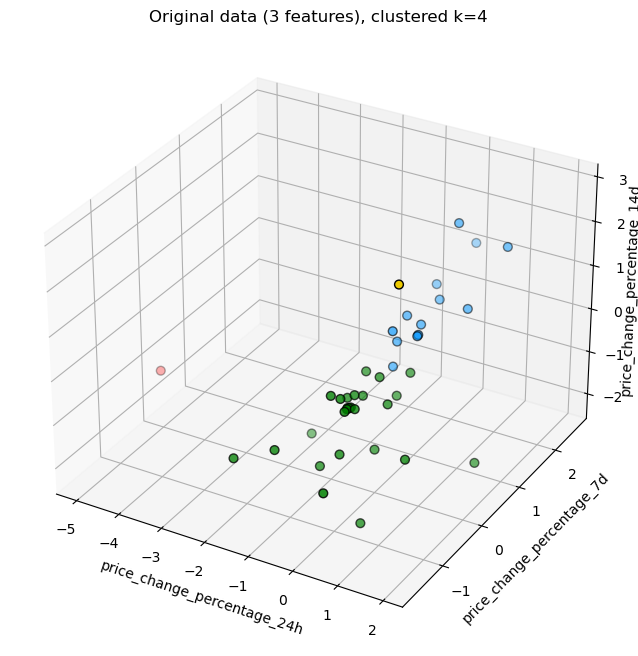

In [59]:
# 3D plot using 3 features from the original crypto market data
plot_3d(df_crypto_scaled_clustered,
        x_col="price_change_percentage_24h",
        y_col="price_change_percentage_7d",
        z_col="price_change_percentage_14d",
        clusters="Cluster",
        title="Original data (3 features), clustered k=4")

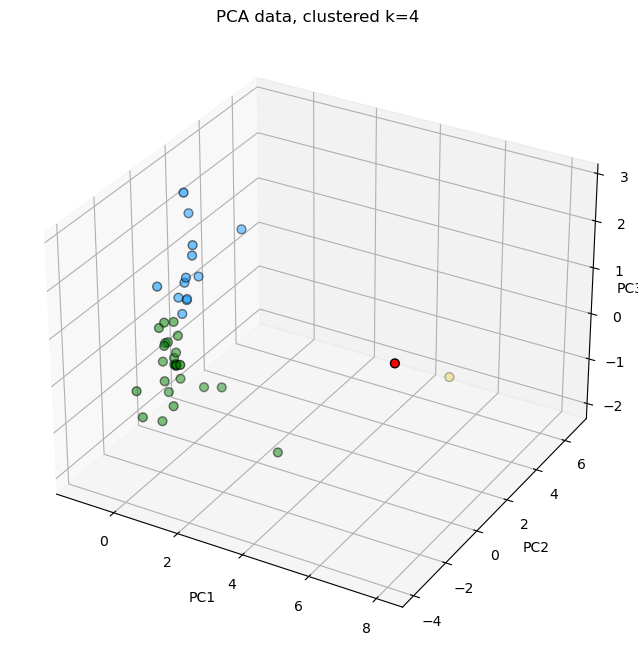

In [56]:
# 3D plot using all 3 principal components
plot_3d(df_crypto_pca_clustered,
        x_col="PC1",
        y_col="PC2",
        z_col="PC3",
        clusters="Cluster",
        title="PCA data, clustered k=4")